<a href="https://colab.research.google.com/github/arunmalik1/PlantLeaf_Classification/blob/main/PlantLeaf_Classification_RegModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is binary classification project using plant images. The idea is to be able to identify diseased vs healthy plants. There are 11 different plants and the entire dataet is divded into 22 categories. 

The dataset is from Kaggle: 
This is a collection of about 4503 images of which contains 2278 images of healthy leaf and 2225 images of the diseased leaf. Twelve plants named as Mango, Arjun, Alstonia Scholaris, Guava, Bael, Jamun, Jatropha, Pongamia Pinnata, Basil, Pomegranate, Lemon, and Chinar have been selected. Images are split between training, test, validating and prediction datasets for model training and testing purposes.



#Import Packages

In [77]:
#install and upgrade packages 

#need pydicom for images
!pip install pydicom --quiet

#install opendatasets to get the data from Kaggle
!pip install opendatasets --upgrade --quiet

#installing keras tuner 
!pip install keras-tuner --quiet
!pip install -q -U keras-tuner --quiet
!pip install git+https://github.com/keras-team/keras-preprocessing.git --quiet
!pip install --upgrade transformers --quiet
!pip install --upgrade datasets --quiet
!pip install -Uqq fastbook --quiet

  Preparing metadata (setup.py) ... done


In [131]:
#import packages 
import pandas as pd
import numpy as np
import scipy
from fastbook import *
import cv2


#import plot 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display
%matplotlib inline
from PIL import Image
import PIL.Image
import seaborn as sns
import plotly.express as px

from tabulate import tabulate
import os
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

#import keras and tenserflow and pydicom
import keras
import pydicom
import keras_tuner as kt
from keras import layers
from kerastuner import RandomSearch
from keras.utils import to_categorical
from keras.callbacks import learning_rate_schedule
from kerastuner.engine.hyperparameters import HyperParameters


#import tenserflow functions
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

#Import Data

In [79]:
#load the train set
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/Plant_Leaf_Classitication/Data/Plants_2/train',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256),
    batch_size = 32,
    )

Found 4274 files belonging to 22 classes.


In [80]:
#load the test set
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/Plant_Leaf_Classitication/Data/Plants_2/test',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256)
    )

Found 110 files belonging to 22 classes.


In [81]:
#load the validation set
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/Plant_Leaf_Classitication/Data/Plants_2/valid',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256)
    )

Found 110 files belonging to 22 classes.


#Create a base CNN Model

In [82]:
base_model1 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
base_model1.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

#rescale the images 
tf.keras.layers.Rescaling(1./255)
# max pool in 2x2 window
base_model1.add(MaxPooling2D(pool_size=(4, 4)))
# define 3x3 filter window sizes. Create 64 filters.
base_model1.add(Conv2D(64, (3, 3), activation='relu'))
base_model1.add(MaxPooling2D((2, 2)))
base_model1.add(Conv2D(128, (3, 3), activation='relu'))
base_model1.add(MaxPooling2D((2, 2)))
base_model1.add(Conv2D(256, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
base_model1.add(Flatten())
base_model1.add(Dense(64, activation='relu'))
base_model1.add(Dense(22, activation='softmax'))

In [83]:
base_model1.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [84]:
history_cnn = base_model1.fit(train_ds, epochs= 20, validation_data= validation_ds)

Epoch 1/20
134/134 [==============================] - 63s 434ms/step - loss: 3.9446 - accuracy: 0.1928 - val_loss: 2.6505 - val_accuracy: 0.2545
Epoch 2/20
134/134 [==============================] - 60s 424ms/step - loss: 1.9228 - accuracy: 0.4176 - val_loss: 2.2732 - val_accuracy: 0.3545
Epoch 3/20
134/134 [==============================] - 63s 441ms/step - loss: 1.4478 - accuracy: 0.5522 - val_loss: 1.8078 - val_accuracy: 0.4000
Epoch 4/20
134/134 [==============================] - 57s 401ms/step - loss: 1.0859 - accuracy: 0.6563 - val_loss: 1.6731 - val_accuracy: 0.5182
Epoch 5/20
134/134 [==============================] - 61s 433ms/step - loss: 0.8810 - accuracy: 0.7178 - val_loss: 1.4799 - val_accuracy: 0.5182
Epoch 6/20
134/134 [==============================] - 63s 439ms/step - loss: 0.6769 - accuracy: 0.7833 - val_loss: 1.8323 - val_accuracy: 0.5273
Epoch 7/20
134/134 [==============================] - 64s 448ms/step - loss: 0.5496 - accuracy: 0.8180 - val_loss: 1.5949 - val_ac

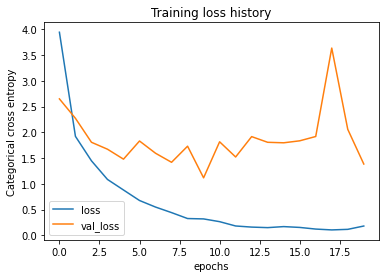

In [85]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

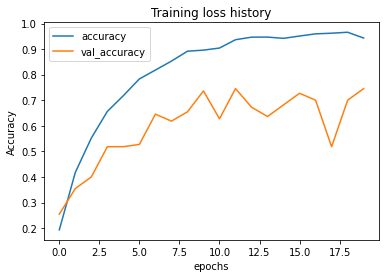

In [86]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [99]:
base_model1.save('Base_model1.h5')

#Building in a simpler base model because of over fitting 

In [91]:
base_model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
base_model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

#rescale the images 
tf.keras.layers.Rescaling(1./255)
# max pool in 2x2 window
# define 3x3 filter window sizes. Create 32 filters.
base_model2.add(MaxPooling2D((2, 2)))
base_model2.add(Conv2D(32, (3, 3), activation='relu'))

base_model2.add(MaxPooling2D((2, 2)))
base_model2.add(Conv2D(32, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
base_model2.add(Flatten())
base_model2.add(Dense(32, activation='relu'))
base_model2.add(Dense(22, activation='softmax'))

In [92]:
base_model2.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [93]:
history_cnn = base_model2.fit(train_ds, epochs= 20, validation_data= validation_ds)

Epoch 1/20
134/134 [==============================] - 58s 399ms/step - loss: 4.3057 - accuracy: 0.2038 - val_loss: 2.6731 - val_accuracy: 0.1636
Epoch 2/20
134/134 [==============================] - 55s 388ms/step - loss: 2.0059 - accuracy: 0.4027 - val_loss: 2.6041 - val_accuracy: 0.2182
Epoch 3/20
134/134 [==============================] - 56s 390ms/step - loss: 1.4052 - accuracy: 0.5767 - val_loss: 2.3205 - val_accuracy: 0.3182
Epoch 4/20
134/134 [==============================] - 57s 401ms/step - loss: 0.9682 - accuracy: 0.6958 - val_loss: 2.6444 - val_accuracy: 0.3364
Epoch 5/20
134/134 [==============================] - 57s 398ms/step - loss: 0.6462 - accuracy: 0.7943 - val_loss: 2.6231 - val_accuracy: 0.3545
Epoch 6/20
134/134 [==============================] - 57s 397ms/step - loss: 0.4310 - accuracy: 0.8636 - val_loss: 2.7070 - val_accuracy: 0.3818
Epoch 7/20
134/134 [==============================] - 56s 394ms/step - loss: 0.3183 - accuracy: 0.9031 - val_loss: 3.1088 - val_ac

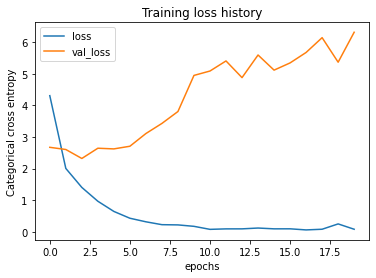

In [94]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

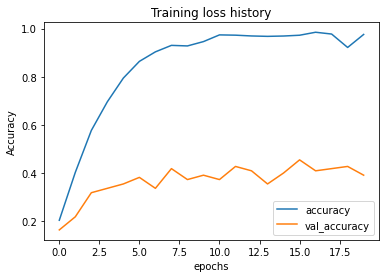

In [95]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [98]:
base_model2.save('BaseSimple.h5')

#Use regularizer techniques 

L1 (Lasso Regression)

In [100]:
reg = L1(1e-5)

In [101]:
L1_model = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
L1_model.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (3,3),
                        activation='relu',
                        input_shape=(256, 256, 3)))

#rescale the images 
tf.keras.layers.Rescaling(1./255)
# max pool in 2x2 window
L1_model.add(BatchNormalization())
L1_model.add(MaxPooling2D(pool_size=(4, 4)))
L1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

L1_model.add(BatchNormalization())
L1_model.add(MaxPooling2D((2, 2)))
L1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
L1_model.add(Flatten())
L1_model.add(Dense(64, activation='relu'))
L1_model.add(Dropout(0.5)) 
L1_model.add(Dense(22, activation='softmax'))

In [102]:
opt = Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-05)
L1_model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

In [103]:
history_cnn = L1_model.fit(train_ds, epochs= 50, validation_data= validation_ds)

Epoch 1/50
134/134 [==============================] - 66s 452ms/step - loss: 4.3520 - accuracy: 0.0512 - val_loss: 3.3413 - val_accuracy: 0.0818
Epoch 2/50
134/134 [==============================] - 62s 435ms/step - loss: 3.6481 - accuracy: 0.0597 - val_loss: 3.1817 - val_accuracy: 0.0909
Epoch 3/50
134/134 [==============================] - 65s 452ms/step - loss: 3.3959 - accuracy: 0.0805 - val_loss: 3.1470 - val_accuracy: 0.0909
Epoch 4/50
134/134 [==============================] - 61s 424ms/step - loss: 3.1855 - accuracy: 0.0976 - val_loss: 3.1259 - val_accuracy: 0.1091
Epoch 5/50
134/134 [==============================] - 62s 434ms/step - loss: 3.0966 - accuracy: 0.1097 - val_loss: 3.1097 - val_accuracy: 0.1091
Epoch 6/50
134/134 [==============================] - 63s 440ms/step - loss: 3.0192 - accuracy: 0.1359 - val_loss: 3.0678 - val_accuracy: 0.1273
Epoch 7/50
134/134 [==============================] - 51s 360ms/step - loss: 2.9558 - accuracy: 0.1383 - val_loss: 3.0277 - val_ac

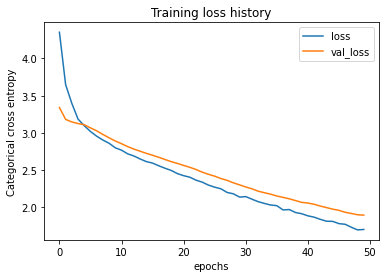

In [104]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

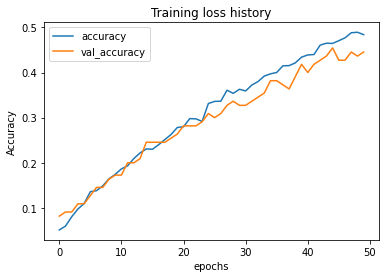

In [105]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [ ]:
L1_model.save('L1Model.h5')

#Add data augmentation to further enchance model capabilities

L1 (Lasso Regression) + Data Augmentation

In [106]:
reg = L1(3e-5)

In [107]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

In [108]:
L1_model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
L1_model2.add(Conv2D(filters=32, kernel_size=(3, 3), strides = (2,2),
                     activation='relu', input_shape=(256, 256, 3),
                     kernel_regularizer = reg))

#rescale the images 
tf.keras.layers.Rescaling(1./255)
# max pool in 2x2 window
L1_model2.add(BatchNormalization())
L1_model2.add(MaxPooling2D(pool_size=(4, 4)))
data_augmentation
L1_model2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

L1_model2.add(BatchNormalization())
L1_model2.add(MaxPooling2D((2, 2)))
data_augmentation
L1_model2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

L1_model2.add(BatchNormalization())
L1_model2.add(MaxPooling2D((2, 2)))
data_augmentation
L1_model2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
L1_model2.add(Flatten())
L1_model2.add(Dense(64, activation='relu'))
L1_model2.add(Dropout(0.6)) 
L1_model2.add(Dense(22, activation='softmax'))

In [109]:
opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-05)
L1_model2.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

In [110]:
history_cnn = L1_model2.fit(train_ds, epochs= 70, validation_data= validation_ds)

Epoch 1/70
134/134 [==============================] - 54s 375ms/step - loss: 3.6474 - accuracy: 0.0583 - val_loss: 3.0672 - val_accuracy: 0.0727
Epoch 2/70
134/134 [==============================] - 53s 372ms/step - loss: 3.0788 - accuracy: 0.1041 - val_loss: 2.9408 - val_accuracy: 0.2000
Epoch 3/70
134/134 [==============================] - 53s 371ms/step - loss: 2.8790 - accuracy: 0.1544 - val_loss: 2.7245 - val_accuracy: 0.2000
Epoch 4/70
134/134 [==============================] - 53s 372ms/step - loss: 2.6944 - accuracy: 0.1975 - val_loss: 2.5511 - val_accuracy: 0.2182
Epoch 5/70
134/134 [==============================] - 54s 381ms/step - loss: 2.5205 - accuracy: 0.2489 - val_loss: 2.3996 - val_accuracy: 0.2545
Epoch 6/70
134/134 [==============================] - 54s 380ms/step - loss: 2.3529 - accuracy: 0.2859 - val_loss: 2.2432 - val_accuracy: 0.2727
Epoch 7/70
134/134 [==============================] - 54s 379ms/step - loss: 2.2514 - accuracy: 0.3201 - val_loss: 2.1156 - val_ac

In [115]:
#sanity check, evaluate on the validation set
L1_model2.evaluate(validation_ds)

4/4 [==============================] - 1s 27ms/step - loss: 1.1894 - accuracy: 0.7545


[1.1894404888153076, 0.7545454502105713]

In [116]:
#moment of truth
L1_model2.evaluate(test_ds)

4/4 [==============================] - 3s 28ms/step - loss: 0.8841 - accuracy: 0.7727


[0.8840641975402832, 0.7727272510528564]

In [113]:
L1_model2.save('L1AugmentationModel.h5')

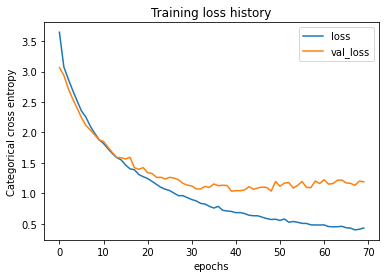

In [111]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

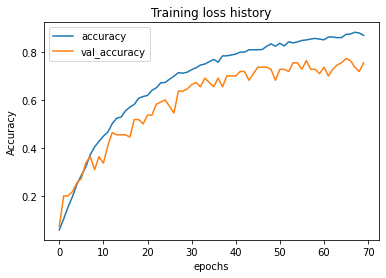

In [112]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [118]:
test_generator = ImageDataGenerator()
img_width, img_height = 256, 256
test_data_generator = test_generator.flow_from_directory(
     '/content/drive/MyDrive/Colab Notebooks/Plant_Leaf_Classitication/Data/Plants_2/valid',
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = L1_model2.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 110 images belonging to 22 classes.
4/4 [==============================] - 36s 9s/step


In [119]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

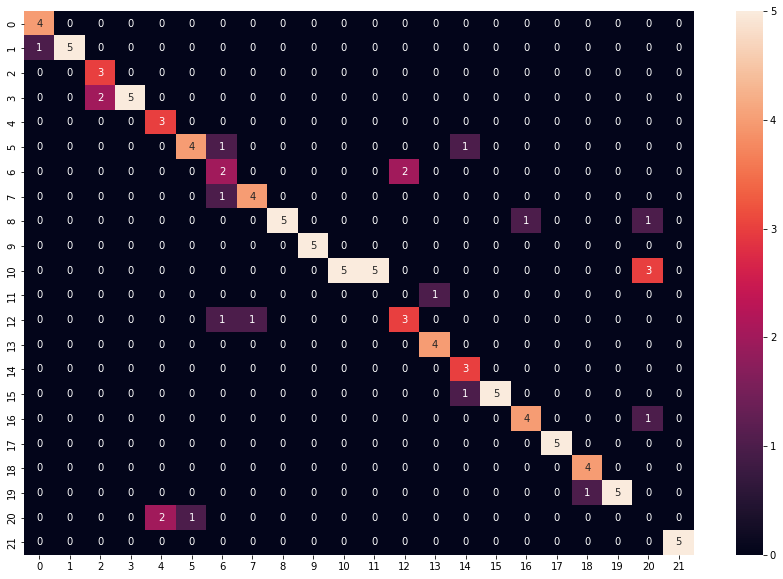

In [126]:
plt.figure(figsize=(15, 10))
ax= plt.subplot()
sns.heatmap(confusion_matrix(predicted_classes, true_classes), annot = True, fmt='g', ax=ax)

In [121]:
#metrics report
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                   precision    recall  f1-score   support

Alstonia Scholaris diseased (P2a)       1.00      0.80      0.89         5
 Alstonia Scholaris healthy (P2b)       0.83      1.00      0.91         5
             Arjun diseased (P1a)       1.00      0.60      0.75         5
              Arjun healthy (P1b)       0.71      1.00      0.83         5
              Bael diseased (P4b)       1.00      0.60      0.75         5
               Basil healthy (P8)       0.67      0.80      0.73         5
           Chinar diseased (P11b)       0.50      0.40      0.44         5
            Chinar healthy (P11a)       0.80      0.80      0.80         5
             Gauva diseased (P3b)       0.71      1.00      0.83         5
              Gauva healthy (P3a)       1.00      1.00      1.00         5
             Jamun diseased (P5b)       0.38      1.00      0.56         5
              Jamun healthy (P5a)       0.00      0.00      0.00         5
          Jatropha disea

In [ ]:
L1_model2.save('BestL1Model.h5')

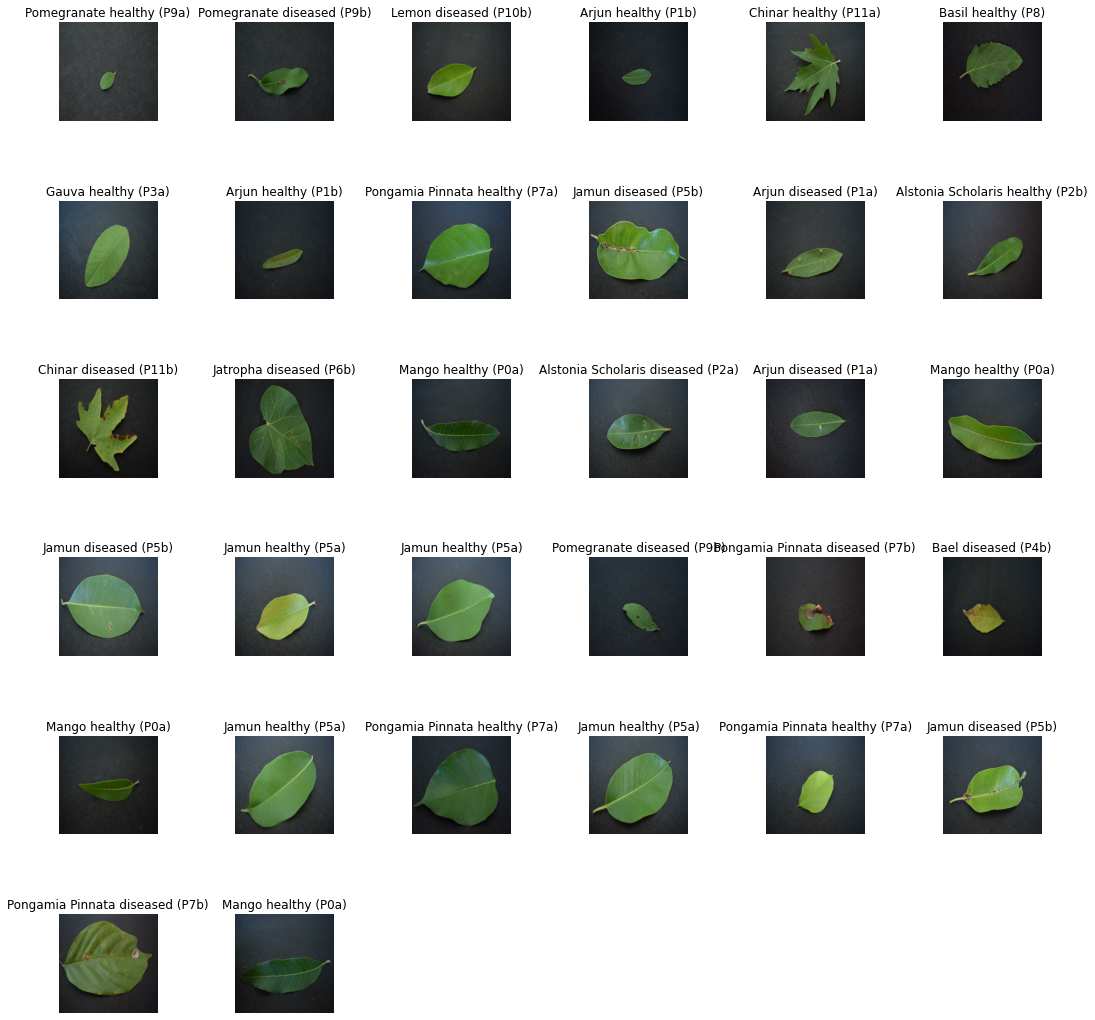

In [151]:

class_names = train_ds.class_names

### To visualize the images
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

# Plotting the images
plt.tight_layout(pad=1)
plt.show()

#L2 (Ridge Regression) regularizer with Augmentation

In [ ]:
#setup a regularizer 
reg = L2(3e-5)

In [ ]:
#since I only have 4K data points for 22 classifications, using augments to create more data
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

In [ ]:
#making a learning rate schedule to decay the learning rate 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=3e-5,
    decay_steps=50,
    decay_rate=0.9)

In [ ]:
L2_model = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
L2_model.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3),
                        kernel_regularizer = reg))

#rescale the images 
tf.keras.layers.Rescaling(1./255)
# max pool in 2x2 window
L2_model.add(BatchNormalization())
L2_model.add(MaxPooling2D(pool_size=(4, 4)))
data_augmentation
L2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

#L2_model.add(BatchNormalization())
#L2_model.add(MaxPooling2D((2, 2)))
#data_augmentation
#L2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
L2_model.add(Flatten())
L2_model.add(Dense(64, activation='relu'))
L1_model2.add(Dropout(0.6)) 
L2_model.add(Dense(22, activation='softmax'))

In [ ]:
opt = Adam(learning_rate = lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-05)
L2_model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])


In [ ]:
history_cnn = L2_model.fit(train_ds, epochs= 50, validation_data= validation_ds)

In [ ]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

In [ ]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [ ]:
test_generator = ImageDataGenerator()
img_width, img_height = 256, 256
test_data_generator = test_generator.flow_from_directory(
     '/content/plant-leaves-for-image-classification/Plants_2/valid',
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = L2_model.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
plt.figure(figsize=(15, 10))
ax= plt.subplot()
sns.heatmap(confusion_matrix(predicted_classes, true_classes), annot=True, fmt='g', ax=ax)

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

In [ ]:
L2_model.save('L2Model.h5')

#Evalute on the test set

In [ ]:
L1_model2.evaluate(test_ds)

#Best Model 

In [ ]:
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)
history = model.fit(X_train, y_train, epochs = 10000, batch_size = 32, validation_split = 0.2, callbacks=[trainCallback])